In [1]:
from functools import partial
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
from sklearn.metrics import accuracy_score, mean_squared_log_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import load_model

In [2]:
df = pd.read_csv('./data/InsNova_data_2023_train.csv')
df.drop(['id'], axis=1, inplace=True)
df.reset_index(drop=True, inplace=True)

df.head()

,veh_value,exposure,veh_body,veh_age,gender,area,agecat,engine_type,max_power,driving_history_score,...,marital_status,e_bill,time_of_week_driven,time_driven,trm_len,credit_score,high_education_ind,clm,numclaims,claimcst0
0,0.77,0.444504,SEDAN,4,M,D,3,petrol,147,67.0,...,S,1,weekday,6pm - 12am,6,640.448137,1.0,0,0,0.0
1,4.45,0.562183,STNWG,1,M,A,3,petrol,158,76.0,...,S,1,weekday,6am - 12pm,12,683.749691,0.0,0,0,0.0
2,4.90,0.465244,STNWG,1,F,A,3,petrol,159,58.0,...,M,1,weekday,6pm - 12am,6,653.656117,1.0,0,0,0.0
3,0.48,0.271039,PANVN,4,M,A,4,petrol,80,72.0,...,S,1,weekday,12pm - 6pm,12,642.574671,0.0,0,0,0.0
4,0.85,0.141624,SEDAN,4,F,A,5,petrol,126,91.0,...,S,0,weekday,6am - 12pm,6,647.175035,0.0,0,0,0.0


In [3]:
df_claims, df_no_claims = df[df['clm'] == 1], df[df['clm'] == 0]
df_claims.reset_index(drop=True, inplace=True)
df_no_claims.reset_index(drop=True, inplace=True)

print(df_claims.shape, df_no_claims.shape)

(1542, 21) (21077, 21)


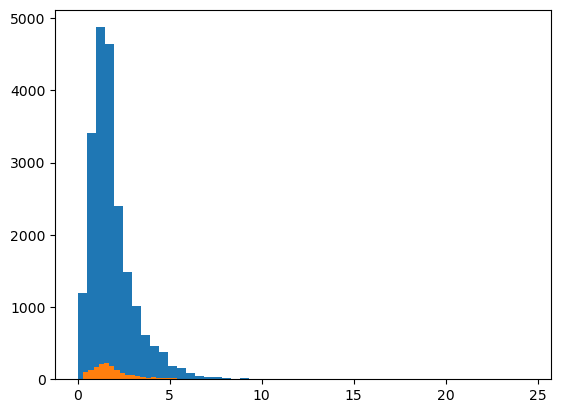

In [4]:
plt.hist(df_no_claims['veh_value'], bins=50)
plt.hist(df_claims['veh_value'], bins=50)
plt.show()

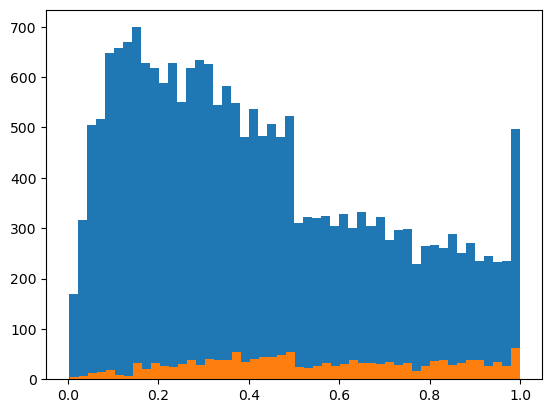

In [54]:
plt.hist(df_no_claims['exposure'], bins=50)
plt.hist(df_claims['exposure'], bins=50)
plt.show()

In [55]:
print(df_no_claims['veh_body'].value_counts())
print(df_claims['veh_body'].value_counts())

SEDAN    6877
HBACK    5898
STNWG    5024
UTE      1444
TRUCK     550
HDTOP     471
COUPE     255
MIBUS     239
PANVN     234
MCARA      33
CONVT      28
BUS        16
RDSTR       8
Name: veh_body, dtype: int64
SEDAN    499
STNWG    412
HBACK    407
UTE       86
HDTOP     39
TRUCK     36
COUPE     24
PANVN     14
MIBUS     14
MCARA      7
BUS        3
RDSTR      1
Name: veh_body, dtype: int64


In [56]:
print(df_no_claims['veh_age'].value_counts())
print(df_claims['veh_age'].value_counts())

3    6215
4    5878
2    5071
1    3913
Name: veh_age, dtype: int64
3    479
4    407
2    403
1    253
Name: veh_age, dtype: int64


In [57]:
print(df_no_claims['gender'].value_counts())
print(df_claims['gender'].value_counts())

F    11947
M     9130
Name: gender, dtype: int64
F    906
M    636
Name: gender, dtype: int64


In [58]:
print(df_no_claims['area'].value_counts())
print(df_claims['area'].value_counts())

C    6459
A    5079
B    4153
D    2460
E    1831
F    1095
Name: area, dtype: int64
C    485
A    371
B    313
D    160
E    120
F     93
Name: area, dtype: int64


In [59]:
print(df_no_claims['agecat'].value_counts())
print(df_claims['agecat'].value_counts())

4    5009
3    4914
2    4064
5    3358
6    2041
1    1691
Name: agecat, dtype: int64
3    390
4    374
2    296
5    186
1    169
6    127
Name: agecat, dtype: int64


In [60]:
print(df_no_claims['engine_type'].value_counts())
print(df_claims['engine_type'].value_counts())

petrol      13181
dissel       4285
hybrid       1964
electric     1647
Name: engine_type, dtype: int64
petrol      965
dissel      318
hybrid      143
electric    116
Name: engine_type, dtype: int64


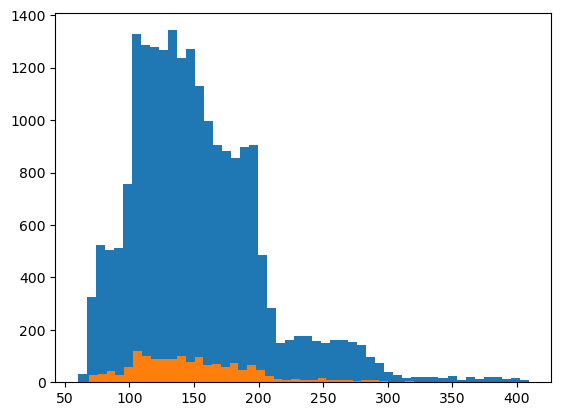

In [66]:
plt.hist(df_no_claims['max_power'], bins=50)
plt.hist(df_claims['max_power'], bins=50)
plt.show()

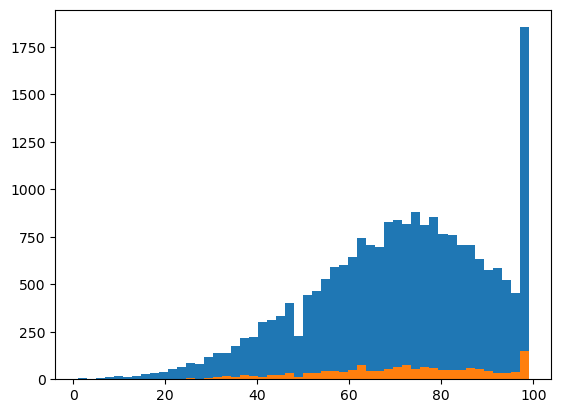

In [64]:
plt.hist(df_no_claims['driving_history_score'], bins=50)
plt.hist(df_claims['driving_history_score'], bins=50)
plt.show()

In [67]:
print(df_no_claims['veh_color'].value_counts())
print(df_claims['veh_color'].value_counts())

white     4544
gray      4426
black     4072
blue      1862
silver    1694
red       1269
green     1221
brown     1064
yellow     925
Name: veh_color, dtype: int64
gray      340
white     329
black     287
blue      140
silver    124
green      95
red        91
brown      78
yellow     58
Name: veh_color, dtype: int64


In [68]:
print(df_no_claims['marital_status'].value_counts())
print(df_claims['marital_status'].value_counts())

M    11553
S     9524
Name: marital_status, dtype: int64
M    848
S    694
Name: marital_status, dtype: int64


In [69]:
print(df_no_claims['e_bill'].value_counts())
print(df_claims['e_bill'].value_counts())

1    13415
0     7662
Name: e_bill, dtype: int64
1    989
0    553
Name: e_bill, dtype: int64


In [70]:
print(df_no_claims['time_of_week_driven'].value_counts())
print(df_claims['time_of_week_driven'].value_counts())

weekday    16882
weekend     4195
Name: time_of_week_driven, dtype: int64
weekday    1223
weekend     319
Name: time_of_week_driven, dtype: int64


In [71]:
print(df_no_claims['time_driven'].value_counts())
print(df_claims['time_driven'].value_counts())

12pm - 6pm     8461
6am - 12pm     8383
6pm - 12am     3174
12am - 6 am    1059
Name: time_driven, dtype: int64
12pm - 6pm     641
6am - 12pm     617
6pm - 12am     211
12am - 6 am     73
Name: time_driven, dtype: int64


In [72]:
print(df_no_claims['trm_len'].value_counts())
print(df_claims['trm_len'].value_counts())

12    15804
6      5273
Name: trm_len, dtype: int64
12    1137
6      405
Name: trm_len, dtype: int64


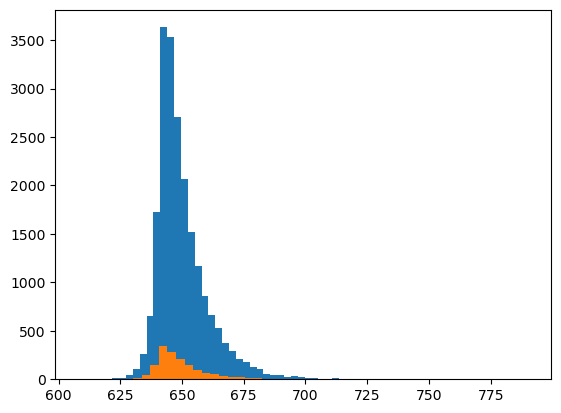

In [75]:
plt.hist(df_no_claims['credit_score'], bins=50)
plt.hist(df_claims['credit_score'], bins=50)
plt.show()

In [76]:
print(df_no_claims['high_education_ind'].value_counts())
print(df_claims['high_education_ind'].value_counts())

0.0    18757
1.0     2320
Name: high_education_ind, dtype: int64
0.0    1213
1.0     329
Name: high_education_ind, dtype: int64


In [4]:
df_dummies = pd.get_dummies(df, columns=['veh_body', 'veh_age', 'gender', 'area', 'agecat', 'engine_type', 'veh_color', 'marital_status', 'e_bill', 'time_of_week_driven', 'time_driven', 'trm_len', 'high_education_ind'])

In [6]:
# Columns that are significantly different from each other:
# 
clm_df = df_dummies.drop(columns=['numclaims', 'claimcst0'])

In [7]:
majority_class = clm_df[clm_df['clm'] == 0]
minority_class = clm_df[clm_df['clm'] == 1]

oversampled_minority = resample(minority_class, replace=True, n_samples=len(majority_class))

oversampled_minority.shape

(21077, 64)

In [8]:
clm_balanced_df = pd.concat([majority_class, oversampled_minority])
clm_balanced_df = clm_balanced_df.sample(frac=1)
clm_balanced_df.reset_index(drop=True, inplace=True)

clm_balanced_df.head()

,veh_value,exposure,max_power,driving_history_score,credit_score,clm,veh_body_BUS,veh_body_CONVT,veh_body_COUPE,veh_body_HBACK,...,time_of_week_driven_weekday,time_of_week_driven_weekend,time_driven_12am - 6 am,time_driven_12pm - 6pm,time_driven_6am - 12pm,time_driven_6pm - 12am,trm_len_6,trm_len_12,high_education_ind_0.0,high_education_ind_1.0
0,2.86,0.296723,176,58.0,655.880933,0,0,0,0,0,...,0,1,0,0,1,0,0,1,1,0
1,1.07,0.460667,104,9.0,648.617112,1,0,0,0,1,...,1,0,0,1,0,0,0,1,1,0
2,2.55,0.411255,114,32.0,649.096303,1,0,0,0,0,...,1,0,0,1,0,0,0,1,1,0
3,1.68,0.648425,102,77.0,645.238864,0,0,0,0,1,...,1,0,0,1,0,0,0,1,1,0
4,1.73,0.655972,133,87.0,645.642167,1,0,0,0,0,...,1,0,0,1,0,0,0,1,1,0


In [9]:
clm_x, clm_y = clm_balanced_df.drop(columns=['clm']), clm_balanced_df['clm']
clm_x_train, clm_x_test, clm_y_train, clm_y_test = train_test_split(clm_x, clm_y, test_size=1 / 3)

print(clm_x_train.shape, clm_x_test.shape, clm_y_train.shape, clm_y_test.shape)

(28102, 63) (14052, 63) (28102,) (14052,)


In [46]:
clm_model = keras.Sequential([
    layers.Input(shape=(clm_x_train.shape[-1],)),  # Input layer with input_dim features
    layers.Dense(128, activation='relu'),  # Hidden layer with ReLU activation
    layers.Dense(64, activation='relu'),   # Additional hidden layer
    layers.Dense(1, activation='sigmoid')  # Output layer with a sigmoid activation for binary classification
])

# clm_model = keras.Sequential([
#     layers.Input(shape=(clm_x_train.shape[-1],)),
#     layers.Dense(256, activation='relu'),
#     layers.Dropout(0.25),
#     layers.Dense(128, activation='relu'),
#     layers.Dense(64, activation='relu'),
#     layers.Dropout(0.25),
#     layers.Dense(32, activation='relu'),
#     layers.Dense(1, activation='sigmoid')
# ])

n_epochs = 100
batch_size = 32
early_stop = EarlyStopping(monitor='val_accuracy', verbose=1, patience=int(n_epochs * 0.25))
model_checkpoint = ModelCheckpoint('./models/dnn_clm', monitor='val_accuracy', save_best_only=True, verbose=1)

clm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = clm_model.fit(
    clm_x_train, clm_y_train,
    batch_size=batch_size,
    epochs=n_epochs,
    validation_data=(clm_x_test, clm_y_test),
    callbacks=[early_stop, model_checkpoint]
)

Epoch 1/100


2023-10-30 15:04:13.562855: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/75428952-3aa4-11ee-8b65-46d450270006/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x32x1x1xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/75428952-3aa4-11ee-8b65-46d450270006/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x32x1x1xi1>'
loc

874/879 [============================>.] - ETA: 0s - loss: 1.1228 - accuracy: 0.5163

loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/75428952-3aa4-11ee-8b65-46d450270006/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x6x1x1xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/75428952-3aa4-11ee-8b65-46d450270006/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x6x1x1xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/75428952-3aa4-11ee-8b65-46d450270006/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShad

879/879 [==============================] - ETA: 0s - loss: 1.1215 - accuracy: 0.5164

2023-10-30 15:04:27.244420: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/75428952-3aa4-11ee-8b65-46d450270006/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x32x1x1xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/75428952-3aa4-11ee-8b65-46d450270006/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x32x1x1xi1>'
loc


Epoch 1: val_accuracy improved from -inf to 0.50157, saving model to ./models/dnn_clm
INFO:tensorflow:Assets written to: ./models/dnn_clm/assets
879/879 [==============================] - 19s 19ms/step - loss: 1.1215 - accuracy: 0.5164 - val_loss: 0.9724 - val_accuracy: 0.5016
Epoch 2/100
877/879 [============================>.] - ETA: 0s - loss: 0.8166 - accuracy: 0.5323
Epoch 2: val_accuracy improved from 0.50157 to 0.55323, saving model to ./models/dnn_clm
INFO:tensorflow:Assets written to: ./models/dnn_clm/assets
879/879 [==============================] - 13s 14ms/step - loss: 0.8167 - accuracy: 0.5323 - val_loss: 0.6966 - val_accuracy: 0.5532
Epoch 3/100
878/879 [============================>.] - ETA: 0s - loss: 0.7889 - accuracy: 0.5421
Epoch 3: val_accuracy improved from 0.55323 to 0.58106, saving model to ./models/dnn_clm
INFO:tensorflow:Assets written to: ./models/dnn_clm/assets
879/879 [==============================] - 13s 15ms/step - loss: 0.7890 - accuracy: 0.5421 - val_l

KeyboardInterrupt: 

In [47]:
clm_pred = clm_model.predict(clm_x_test) >= 0.5

print(accuracy_score(clm_y_test, clm_pred))
print(np.unique(clm_pred, return_counts=True))
print(clm_y_test.value_counts())

2023-10-30 15:07:36.140597: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


440/440 [==============================] - 2s 4ms/step
0.6071733561058924
(array([False,  True]), array([6354, 7698]))
0    7048
1    7004
Name: clm, dtype: int64


In [44]:
foo = clm_model.predict(clm_x_test)
foo.min()

440/440 [==============================] - 2s 3ms/step


0.49785686

In [45]:
foo.max()

0.49785686

In [5]:
cost_df = df_dummies.drop(columns=['clm', 'numclaims'])

In [6]:
majority_class = cost_df[cost_df['claimcst0'] == 0]
minority_class = cost_df[cost_df['claimcst0'] != 0]

print(majority_class.shape)
print(minority_class.shape)

(21077, 64)
(1542, 64)


In [7]:
oversampled_minority = resample(minority_class, replace=True, n_samples=len(majority_class))

oversampled_minority.shape

(21077, 64)

In [8]:
cost_balanced_df = pd.concat([majority_class, oversampled_minority])
cost_balanced_df = cost_balanced_df.sample(frac=1)
cost_balanced_df.reset_index(drop=True, inplace=True)

cost_balanced_df[cost_balanced_df['claimcst0'] == 0].shape

(21077, 64)

In [9]:
cost_x, cost_y = cost_balanced_df.drop(columns=['claimcst0']), cost_balanced_df['claimcst0']
cost_y = np.log(cost_y + 1)

print(cost_x.shape, cost_y.shape)

(42154, 63) (42154,)


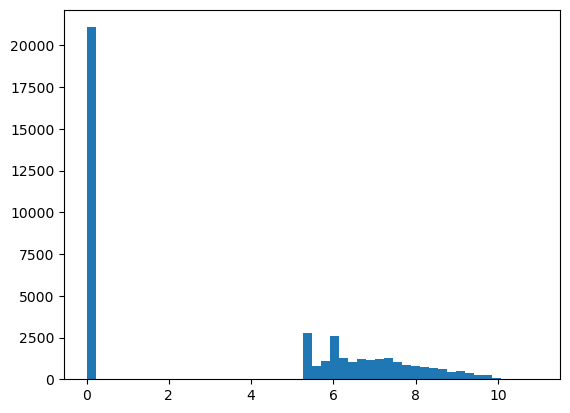

In [10]:
plt.hist(cost_y, bins=50)
plt.show()

In [11]:
cost_x_train, cost_x_test, cost_y_train, cost_y_test = train_test_split(cost_x, cost_y, test_size=1 / 3)

scaler = StandardScaler()
cost_x_train = scaler.fit_transform(cost_x_train)
cost_x_test = scaler.transform(cost_x_test)

cost_x_train, cost_x_val, cost_y_train, cost_y_val = train_test_split(cost_x_train, cost_y_train, test_size=1 / 3)

print(cost_x_train.shape, cost_x_val.shape, cost_x_test.shape, cost_y_train.shape, cost_y_val.shape, cost_y_test.shape)

(18734, 63) (9368, 63) (14052, 63) (18734,) (9368,) (14052,)


In [12]:
def tweedie_loss(p):
    def loss(y_true, y_pred):
        a = y_true * tf.exp(y_pred * (1 - p)) / (1 - p)
        b = tf.exp(y_pred * (2 - p)) / (2 - p)

        loss = -a + b

        return tf.reduce_mean(loss)
    
    return loss

In [14]:
best_loss, best_power = np.inf, None
curr_run = 0

for power in np.random.uniform(1, 2, 50):
    curr_run += 1
    print(f'Run number {curr_run}')

    curr_model = keras.Sequential([
        layers.Input(shape=(cost_x_train.shape[-1],)),
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'), 
        layers.Dropout(0.2),
        layers.Dense(1, activation='relu')
    ])

    # curr_model = keras.Sequential([
    #     layers.Input(shape=(cost_x_train.shape[-1],)),
    #     layers.Dense(256, activation='relu'),
    #     layers.Dropout(0.2),
    #     layers.Dense(128, activation='relu'),
    #     layers.Dense(64, activation='relu'),
    #     layers.Dropout(0.2),
    #     layers.Dense(32, activation='relu'),
    #     layers.Dense(1, activation='sigmoid')
    # ])

    n_epochs = 100
    batch_size = 32
    early_stop = EarlyStopping(monitor='val_mean_squared_logarithmic_error', verbose=1, patience=int(n_epochs * 0.1))
    model_checkpoint = ModelCheckpoint('./models/dnn_cost', monitor='val_mean_squared_logarithmic_error', save_best_only=True, verbose=1)

    curr_model.compile(optimizer='adam', loss=tweedie_loss(power), metrics=['mean_squared_logarithmic_error'])

    history = curr_model.fit(
        cost_x_train, cost_y_train,
        batch_size=batch_size,
        epochs=n_epochs,
        validation_data=(cost_x_val, cost_y_val),
        callbacks=[early_stop, model_checkpoint]
    )


    curr_model = load_model('./models/dnn_cost', custom_objects={'loss': tweedie_loss(power)})

    test_pred = curr_model.predict(cost_x_test)
    loss = mean_squared_log_error(cost_y_test, test_pred)

    if loss < best_loss:
        best_loss, best_power = loss, power
        curr_model.save('./models/best_dnn_cost')

    print(f'Best loss and power so far: loss = {best_loss}, power = {best_power}')

print(best_loss, best_power)

Run number 1
Metal device set to: Apple M1 Pro

systemMemory: 32.00 GB
maxCacheSize: 10.67 GB



2023-11-01 09:38:32.189777: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-11-01 09:38:32.189900: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/100


2023-11-01 09:38:32.872849: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-11-01 09:38:33.252582: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


586/586 [==============================] - ETA: 0s - loss: 6.7799 - mean_squared_logarithmic_error: 1.0817

2023-11-01 09:38:45.027980: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.



Epoch 1: val_mean_squared_logarithmic_error improved from inf to 1.02914, saving model to ./models/dnn_cost
INFO:tensorflow:Assets written to: ./models/dnn_cost/assets
586/586 [==============================] - 16s 22ms/step - loss: 6.7799 - mean_squared_logarithmic_error: 1.0817 - val_loss: 6.6069 - val_mean_squared_logarithmic_error: 1.0291
Epoch 2/100
586/586 [==============================] - ETA: 0s - loss: 6.5815 - mean_squared_logarithmic_error: 0.9839
Epoch 2: val_mean_squared_logarithmic_error improved from 1.02914 to 0.98366, saving model to ./models/dnn_cost
INFO:tensorflow:Assets written to: ./models/dnn_cost/assets
586/586 [==============================] - 9s 15ms/step - loss: 6.5815 - mean_squared_logarithmic_error: 0.9839 - val_loss: 6.4935 - val_mean_squared_logarithmic_error: 0.9837
Epoch 3/100
584/586 [============================>.] - ETA: 0s - loss: 6.4633 - mean_squared_logarithmic_error: 0.9197
Epoch 3: val_mean_squared_logarithmic_error improved from 0.98366 to

2023-11-01 09:44:22.948678: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


440/440 [==============================] - 2s 3ms/step
INFO:tensorflow:Assets written to: ./models/best_dnn_cost/assets
Best loss and power so far: loss = 0.6004200574062634, power = 1.6273705230204532
Run number 2
Epoch 1/100


2023-11-01 09:44:25.353954: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


586/586 [==============================] - ETA: 0s - loss: 11.5514 - mean_squared_logarithmic_error: 1.0880

2023-11-01 09:44:36.263299: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.



Epoch 1: val_mean_squared_logarithmic_error improved from inf to 1.03770, saving model to ./models/dnn_cost
INFO:tensorflow:Assets written to: ./models/dnn_cost/assets
586/586 [==============================] - 15s 21ms/step - loss: 11.5514 - mean_squared_logarithmic_error: 1.0880 - val_loss: 11.2518 - val_mean_squared_logarithmic_error: 1.0377
Epoch 2/100
584/586 [============================>.] - ETA: 0s - loss: 11.2981 - mean_squared_logarithmic_error: 0.9935
Epoch 2: val_mean_squared_logarithmic_error improved from 1.03770 to 0.97671, saving model to ./models/dnn_cost
INFO:tensorflow:Assets written to: ./models/dnn_cost/assets
586/586 [==============================] - 9s 15ms/step - loss: 11.2955 - mean_squared_logarithmic_error: 0.9933 - val_loss: 11.1008 - val_mean_squared_logarithmic_error: 0.9767
Epoch 3/100
581/586 [============================>.] - ETA: 0s - loss: 11.1472 - mean_squared_logarithmic_error: 0.9326
Epoch 3: val_mean_squared_logarithmic_error improved from 0.97

2023-11-01 09:50:37.258705: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


440/440 [==============================] - 2s 3ms/step
INFO:tensorflow:Assets written to: ./models/best_dnn_cost/assets
Best loss and power so far: loss = 0.5997299478755258, power = 1.2953708180381232
Run number 3
Epoch 1/100


2023-11-01 09:50:39.466471: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


586/586 [==============================] - ETA: 0s - loss: 6.7960 - mean_squared_logarithmic_error: 1.0780

2023-11-01 09:50:50.328840: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.



Epoch 1: val_mean_squared_logarithmic_error improved from inf to 1.02942, saving model to ./models/dnn_cost
INFO:tensorflow:Assets written to: ./models/dnn_cost/assets
586/586 [==============================] - 15s 22ms/step - loss: 6.7960 - mean_squared_logarithmic_error: 1.0780 - val_loss: 6.6233 - val_mean_squared_logarithmic_error: 1.0294
Epoch 2/100
584/586 [============================>.] - ETA: 0s - loss: 6.6111 - mean_squared_logarithmic_error: 0.9861
Epoch 2: val_mean_squared_logarithmic_error improved from 1.02942 to 0.99809, saving model to ./models/dnn_cost
INFO:tensorflow:Assets written to: ./models/dnn_cost/assets
586/586 [==============================] - 9s 16ms/step - loss: 6.6117 - mean_squared_logarithmic_error: 0.9864 - val_loss: 6.5247 - val_mean_squared_logarithmic_error: 0.9981
Epoch 3/100
582/586 [============================>.] - ETA: 0s - loss: 6.5069 - mean_squared_logarithmic_error: 0.9288
Epoch 3: val_mean_squared_logarithmic_error improved from 0.99809 to

2023-11-01 09:55:10.679521: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


440/440 [==============================] - 2s 3ms/step
Best loss and power so far: loss = 0.5997299478755258, power = 1.2953708180381232
Run number 4
Epoch 1/100


2023-11-01 09:55:12.512659: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


586/586 [==============================] - ETA: 0s - loss: 41.1775 - mean_squared_logarithmic_error: 1.1043

2023-11-01 09:55:24.828641: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.



Epoch 1: val_mean_squared_logarithmic_error improved from inf to 1.03935, saving model to ./models/dnn_cost
INFO:tensorflow:Assets written to: ./models/dnn_cost/assets
586/586 [==============================] - 17s 24ms/step - loss: 41.1775 - mean_squared_logarithmic_error: 1.1043 - val_loss: 40.3245 - val_mean_squared_logarithmic_error: 1.0393
Epoch 2/100
586/586 [==============================] - ETA: 0s - loss: 40.8327 - mean_squared_logarithmic_error: 1.0052
Epoch 2: val_mean_squared_logarithmic_error did not improve from 1.03935
586/586 [==============================] - 9s 16ms/step - loss: 40.8327 - mean_squared_logarithmic_error: 1.0052 - val_loss: 40.2571 - val_mean_squared_logarithmic_error: 1.0476
Epoch 3/100
584/586 [============================>.] - ETA: 0s - loss: 40.6643 - mean_squared_logarithmic_error: 0.9547
Epoch 3: val_mean_squared_logarithmic_error improved from 1.03935 to 0.93032, saving model to ./models/dnn_cost
INFO:tensorflow:Assets written to: ./models/dnn_c

2023-11-01 10:04:34.421201: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


440/440 [==============================] - 2s 3ms/step
INFO:tensorflow:Assets written to: ./models/best_dnn_cost/assets
Best loss and power so far: loss = 0.5966709523727004, power = 1.0834260250688836
Run number 5
Epoch 1/100


2023-11-01 10:04:36.883279: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


586/586 [==============================] - ETA: 0s - loss: 7.0351 - mean_squared_logarithmic_error: 1.0733

2023-11-01 10:04:48.415424: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.



Epoch 1: val_mean_squared_logarithmic_error improved from inf to 1.02831, saving model to ./models/dnn_cost
INFO:tensorflow:Assets written to: ./models/dnn_cost/assets
586/586 [==============================] - 16s 22ms/step - loss: 7.0351 - mean_squared_logarithmic_error: 1.0733 - val_loss: 6.8952 - val_mean_squared_logarithmic_error: 1.0283
Epoch 2/100
584/586 [============================>.] - ETA: 0s - loss: 6.8744 - mean_squared_logarithmic_error: 0.9869
Epoch 2: val_mean_squared_logarithmic_error improved from 1.02831 to 0.95782, saving model to ./models/dnn_cost
INFO:tensorflow:Assets written to: ./models/dnn_cost/assets
586/586 [==============================] - 9s 16ms/step - loss: 6.8750 - mean_squared_logarithmic_error: 0.9870 - val_loss: 6.7952 - val_mean_squared_logarithmic_error: 0.9578
Epoch 3/100
581/586 [============================>.] - ETA: 0s - loss: 6.7740 - mean_squared_logarithmic_error: 0.9279
Epoch 3: val_mean_squared_logarithmic_error improved from 0.95782 to

2023-11-01 10:11:29.042125: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


440/440 [==============================] - 2s 3ms/step
Best loss and power so far: loss = 0.5966709523727004, power = 1.0834260250688836
Run number 6
Epoch 1/100


2023-11-01 10:11:30.974423: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


586/586 [==============================] - ETA: 0s - loss: 8.6415 - mean_squared_logarithmic_error: 1.0828

2023-11-01 10:11:42.615693: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.



Epoch 1: val_mean_squared_logarithmic_error improved from inf to 1.03172, saving model to ./models/dnn_cost
INFO:tensorflow:Assets written to: ./models/dnn_cost/assets
586/586 [==============================] - 16s 23ms/step - loss: 8.6415 - mean_squared_logarithmic_error: 1.0828 - val_loss: 8.4006 - val_mean_squared_logarithmic_error: 1.0317
Epoch 2/100
585/586 [============================>.] - ETA: 0s - loss: 8.4176 - mean_squared_logarithmic_error: 0.9886
Epoch 2: val_mean_squared_logarithmic_error improved from 1.03172 to 0.96781, saving model to ./models/dnn_cost
INFO:tensorflow:Assets written to: ./models/dnn_cost/assets
586/586 [==============================] - 9s 16ms/step - loss: 8.4172 - mean_squared_logarithmic_error: 0.9886 - val_loss: 8.2609 - val_mean_squared_logarithmic_error: 0.9678
Epoch 3/100
583/586 [============================>.] - ETA: 0s - loss: 8.2760 - mean_squared_logarithmic_error: 0.9268
Epoch 3: val_mean_squared_logarithmic_error improved from 0.96781 to

2023-11-01 10:18:55.941763: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


440/440 [==============================] - 2s 3ms/step
Best loss and power so far: loss = 0.5966709523727004, power = 1.0834260250688836
Run number 7
Epoch 1/100


2023-11-01 10:18:57.849595: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


586/586 [==============================] - ETA: 0s - loss: 17.9845 - mean_squared_logarithmic_error: 1.0707

2023-11-01 10:19:09.364062: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.



Epoch 1: val_mean_squared_logarithmic_error improved from inf to 1.01203, saving model to ./models/dnn_cost
INFO:tensorflow:Assets written to: ./models/dnn_cost/assets
586/586 [==============================] - 16s 22ms/step - loss: 17.9845 - mean_squared_logarithmic_error: 1.0707 - val_loss: 17.8696 - val_mean_squared_logarithmic_error: 1.0120
Epoch 2/100
586/586 [==============================] - ETA: 0s - loss: 17.8428 - mean_squared_logarithmic_error: 0.9814
Epoch 2: val_mean_squared_logarithmic_error improved from 1.01203 to 0.95807, saving model to ./models/dnn_cost
INFO:tensorflow:Assets written to: ./models/dnn_cost/assets
586/586 [==============================] - 9s 16ms/step - loss: 17.8428 - mean_squared_logarithmic_error: 0.9814 - val_loss: 17.7813 - val_mean_squared_logarithmic_error: 0.9581
Epoch 3/100
585/586 [============================>.] - ETA: 0s - loss: 17.7557 - mean_squared_logarithmic_error: 0.9200
Epoch 3: val_mean_squared_logarithmic_error did not improve fr

2023-11-01 10:27:29.651295: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


440/440 [==============================] - 2s 3ms/step
INFO:tensorflow:Assets written to: ./models/best_dnn_cost/assets
Best loss and power so far: loss = 0.5882047460302153, power = 1.935742688248691
Run number 8
Epoch 1/100


2023-11-01 10:27:32.121469: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


586/586 [==============================] - ETA: 0s - loss: 125.8186 - mean_squared_logarithmic_error: 1.1040

2023-11-01 10:27:44.019549: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.



Epoch 1: val_mean_squared_logarithmic_error improved from inf to 1.03567, saving model to ./models/dnn_cost
INFO:tensorflow:Assets written to: ./models/dnn_cost/assets
586/586 [==============================] - 16s 23ms/step - loss: 125.8186 - mean_squared_logarithmic_error: 1.1040 - val_loss: 123.6794 - val_mean_squared_logarithmic_error: 1.0357
Epoch 2/100
583/586 [============================>.] - ETA: 0s - loss: 125.4155 - mean_squared_logarithmic_error: 1.0044
Epoch 2: val_mean_squared_logarithmic_error improved from 1.03567 to 1.00599, saving model to ./models/dnn_cost
INFO:tensorflow:Assets written to: ./models/dnn_cost/assets
586/586 [==============================] - 9s 16ms/step - loss: 125.4715 - mean_squared_logarithmic_error: 1.0047 - val_loss: 123.5304 - val_mean_squared_logarithmic_error: 1.0060
Epoch 3/100
584/586 [============================>.] - ETA: 0s - loss: 125.3019 - mean_squared_logarithmic_error: 0.9516
Epoch 3: val_mean_squared_logarithmic_error improved fro

2023-11-01 10:33:52.619563: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


440/440 [==============================] - 2s 3ms/step
Best loss and power so far: loss = 0.5882047460302153, power = 1.935742688248691
Run number 9
Epoch 1/100


2023-11-01 10:33:54.513900: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


586/586 [==============================] - ETA: 0s - loss: 9.2690 - mean_squared_logarithmic_error: 1.0856

2023-11-01 10:34:05.971531: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.



Epoch 1: val_mean_squared_logarithmic_error improved from inf to 1.02855, saving model to ./models/dnn_cost
INFO:tensorflow:Assets written to: ./models/dnn_cost/assets
586/586 [==============================] - 15s 22ms/step - loss: 9.2690 - mean_squared_logarithmic_error: 1.0856 - val_loss: 9.0115 - val_mean_squared_logarithmic_error: 1.0286
Epoch 2/100
586/586 [==============================] - ETA: 0s - loss: 9.0424 - mean_squared_logarithmic_error: 0.9943
Epoch 2: val_mean_squared_logarithmic_error improved from 1.02855 to 0.98660, saving model to ./models/dnn_cost
INFO:tensorflow:Assets written to: ./models/dnn_cost/assets
586/586 [==============================] - 10s 17ms/step - loss: 9.0424 - mean_squared_logarithmic_error: 0.9943 - val_loss: 8.8849 - val_mean_squared_logarithmic_error: 0.9866
Epoch 3/100
583/586 [============================>.] - ETA: 0s - loss: 8.9110 - mean_squared_logarithmic_error: 0.9370
Epoch 3: val_mean_squared_logarithmic_error improved from 0.98660 t

2023-11-01 10:41:02.742072: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


440/440 [==============================] - 2s 3ms/step
Best loss and power so far: loss = 0.5882047460302153, power = 1.935742688248691
Run number 10
Epoch 1/100


2023-11-01 10:41:04.599544: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


586/586 [==============================] - ETA: 0s - loss: 47.4667 - mean_squared_logarithmic_error: 1.0985

2023-11-01 10:41:16.474799: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.



Epoch 1: val_mean_squared_logarithmic_error improved from inf to 1.01402, saving model to ./models/dnn_cost
INFO:tensorflow:Assets written to: ./models/dnn_cost/assets
586/586 [==============================] - 16s 23ms/step - loss: 47.4667 - mean_squared_logarithmic_error: 1.0985 - val_loss: 46.5580 - val_mean_squared_logarithmic_error: 1.0140
Epoch 2/100
585/586 [============================>.] - ETA: 0s - loss: 47.1484 - mean_squared_logarithmic_error: 0.9960
Epoch 2: val_mean_squared_logarithmic_error improved from 1.01402 to 1.01374, saving model to ./models/dnn_cost
INFO:tensorflow:Assets written to: ./models/dnn_cost/assets
586/586 [==============================] - 9s 16ms/step - loss: 47.1458 - mean_squared_logarithmic_error: 0.9959 - val_loss: 46.4315 - val_mean_squared_logarithmic_error: 1.0137
Epoch 3/100
586/586 [==============================] - ETA: 0s - loss: 46.9651 - mean_squared_logarithmic_error: 0.9383
Epoch 3: val_mean_squared_logarithmic_error improved from 1.01

In [13]:
cost_model = load_model('./models/best_dnn_cost', custom_objects={'loss': tweedie_loss(best_power)})

Metal device set to: Apple M1 Pro

systemMemory: 32.00 GB
maxCacheSize: 10.67 GB



2023-11-01 10:59:55.797708: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-11-01 10:59:55.797808: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


2023-11-01 11:00:12.740698: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-11-01 11:00:12.780149: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


440/440 [==============================] - 2s 4ms/step
0.5698272106793854
10.966413673220154 2.6494493
0.0 0.0
5.304213043340572 1.2588515
3.4810004318721184 1.0020964


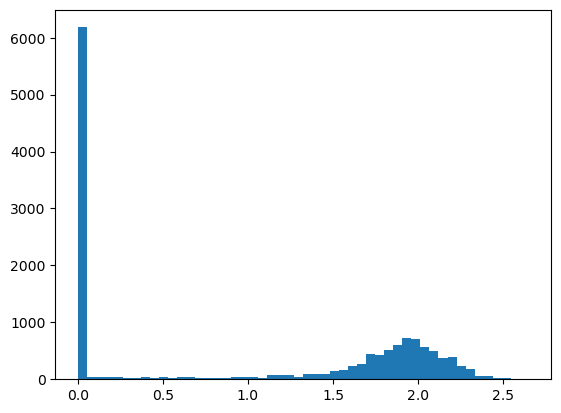

In [14]:
cost_pred = cost_model.predict(cost_x_test)

print(mean_squared_log_error(cost_y_test, cost_pred))
print(cost_y_test.max(), cost_pred.max())
print(cost_y_test.min(), cost_pred.min())
print(np.median(cost_y_test), np.median(cost_pred))
print(cost_y_test.mean(), cost_pred.mean())

# plt.hist(cost_y_test, bins=50)
plt.hist(cost_pred, bins=50)
plt.show()

In [15]:
val_df = pd.read_csv('./data/InsNova_data_2023_vh.csv')
ids = val_df['id']
val_df.drop(['id'], axis=1, inplace=True)
val_df.reset_index(drop=True, inplace=True)

val_df.head()

,veh_value,exposure,veh_body,veh_age,gender,area,agecat,engine_type,max_power,driving_history_score,veh_color,marital_status,e_bill,time_of_week_driven,time_driven,trm_len,credit_score,high_education_ind
0,3.40,0.076279,STNWG,2,M,B,4,petrol,174,83,black,S,1,weekday,6pm - 12am,6,648.247594,0
1,2.55,0.093443,STNWG,2,F,A,3,petrol,181,65,yellow,M,0,weekday,12am - 6 am,12,637.752677,0
2,3.04,0.157762,STNWG,2,F,E,4,petrol,136,64,white,S,1,weekday,12pm - 6pm,12,661.483786,0
3,2.05,0.560735,MIBUS,4,M,C,6,dissel,164,82,gray,M,1,weekday,6am - 12pm,12,647.846365,0
4,1.93,0.258275,HBACK,2,M,C,4,dissel,89,48,black,S,0,weekday,6am - 12pm,12,640.257550,0


In [21]:
val_df_dummies = pd.get_dummies(val_df, columns=['veh_body', 'veh_age', 'gender', 'area', 'agecat', 'engine_type', 'veh_color', 'marital_status', 'e_bill', 'time_of_week_driven', 'time_driven', 'trm_len', 'high_education_ind'])
val_df_dummies = val_df_dummies.rename(columns={'high_education_ind_0': 'high_education_ind_0.0', 'high_education_ind_1': 'high_education_ind_1.0'})

In [22]:
val_df_dummies = scaler.transform(val_df_dummies)

707/707 [==============================] - 4s 5ms/step
0.0
13.830035
0.0
0.45400167


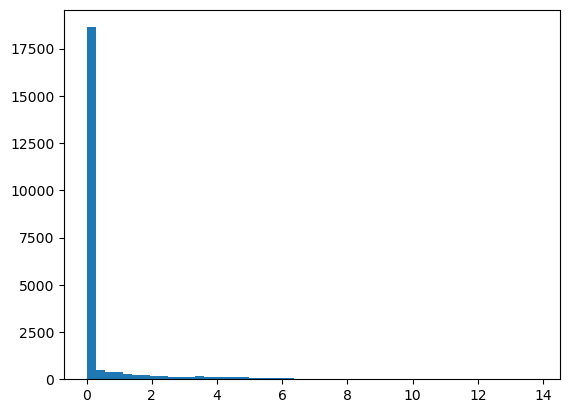

In [26]:
predicted_costs = cost_model.predict(val_df_dummies)
predicted_costs = np.exp(predicted_costs) - 1

print(predicted_costs.min())
print(predicted_costs.max())
print(np.median(predicted_costs))
print(predicted_costs.mean())

plt.hist(predicted_costs, bins=50)
plt.show()

In [93]:
submission_df = pd.DataFrame({'id': ids, 'Predict': predicted_costs.reshape(-1,)})
submission_df.head()

,id,Predict
0,1,1228.372559
1,2,1294.671997
2,3,1186.906128
3,4,424.801270
4,5,0.000000


In [94]:
submission_df.to_csv('./data/submission.csv', index=False)